In [1]:
import numpy as np
import pandas as pd
import os
from ast import literal_eval
import json
from datetime import datetime
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fig = plt.figure(figsize =(10, 8))

<Figure size 720x576 with 0 Axes>

In [3]:
receipts = pd.read_json("receipts.json",lines=True)
brands = pd.read_json("brands.json",lines=True)
users = pd.read_json("users.json",lines=True)

# First: Review Existing Unstructured Data and Diagram a New Structured Relational Data Model

## Receipts Table

In [4]:
receipts

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,{'$oid': '603cc0630a720fde100003e6'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614594147000},{'$date': 1614594147000},NaN,{'$date': 1614594148000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
1115,{'$oid': '603d0b710a720fde1000042a'},NaN,NaN,{'$date': 1614613361873},{'$date': 1614613361873},NaN,{'$date': 1614613361873},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1116,{'$oid': '603cf5290a720fde10000413'},NaN,NaN,{'$date': 1614607657664},{'$date': 1614607657664},NaN,{'$date': 1614607657664},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1117,{'$oid': '603ce7100a7217c72c000405'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614604048000},{'$date': 1614604048000},NaN,{'$date': 1614604049000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33


In [5]:
receipts.dtypes

_id                         object
bonusPointsEarned          float64
bonusPointsEarnedReason     object
createDate                  object
dateScanned                 object
finishedDate                object
modifyDate                  object
pointsAwardedDate           object
pointsEarned               float64
purchaseDate                object
purchasedItemCount         float64
rewardsReceiptItemList      object
rewardsReceiptStatus        object
totalSpent                 float64
userId                      object
dtype: object

### Structure of the Original Dataframe:

1. There are 15 columns and 1119 rows in the original dataset. For the original dataset, 4 columns are of data type "float64", all the other coulmns are "object".

In [6]:
receipts.describe()

,bonusPointsEarned,pointsEarned,purchasedItemCount,totalSpent
count,544.000000,609.000000,635.00000,684.000000
mean,238.893382,585.962890,14.75748,77.796857
std,299.091731,1357.166947,61.13424,347.110349
min,5.000000,0.000000,0.00000,0.000000
25%,5.000000,5.000000,1.00000,1.000000
50%,45.000000,150.000000,2.00000,18.200000
75%,500.000000,750.000000,5.00000,34.960000
max,750.000000,10199.800000,689.00000,4721.950000


### Basic Summary Statistics of the Numerical Coulumns

1. The minimum bonusPointsEarned is 5 points, the maximum of bonusPointsEarned is 750 points, the mean of bonusPointsEarned is 238.89. The standard deviation is 299.09, which is relatively large. The median is 45.
2. The minimum PointsEarned is 0 points, the maximum of PointsEarned is 10199.8 points, the mean of PointsEarned is 585.96. The standard deviation is 1357, which is very large. The median is 150.
3. The minimum purchasedItemCount is 0, the maximum of purchasedItemCount is 689, the mean of purchasedItemCount is 14.75. The standard deviation is 61.13, which is reletivaly small. The median is 2.
4. The minimum totalSpent is 0 dollars, the maximum of totalSpent is 4721.95 dollars, the mean of totalSpent is 77.79. The standard deviation is 347.11, which is reletivaly large. The median is 18.2.

In [7]:
 # replace field that's entirely space (or empty) with NaN 
receipts = receipts.replace(r'^\s*$', np.nan, regex=True) 

In [8]:
receipts

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,{'$oid': '603cc0630a720fde100003e6'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614594147000},{'$date': 1614594147000},NaN,{'$date': 1614594148000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
1115,{'$oid': '603d0b710a720fde1000042a'},NaN,NaN,{'$date': 1614613361873},{'$date': 1614613361873},NaN,{'$date': 1614613361873},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1116,{'$oid': '603cf5290a720fde10000413'},NaN,NaN,{'$date': 1614607657664},{'$date': 1614607657664},NaN,{'$date': 1614607657664},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1117,{'$oid': '603ce7100a7217c72c000405'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614604048000},{'$date': 1614604048000},NaN,{'$date': 1614604049000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33


In [9]:
#Find columns with NaNs:
null_in_column=np.sum(np.where(receipts.isnull(),1,0),axis=0) # compute number of nulls in each column
nonzeroind = np.nonzero(null_in_column)[0] # find indexes of null columns
colname_missing = np.array(list(receipts.columns))[nonzeroind] # column names with null inside
number_of_null = null_in_column[nonzeroind] # number of nulls in each column
for name, number in zip(colname_missing, number_of_null): print ("Column",name , "has" ,number, "missing values.")

Column bonusPointsEarned has 575 missing values.
Column bonusPointsEarnedReason has 575 missing values.
Column finishedDate has 551 missing values.
Column pointsAwardedDate has 582 missing values.
Column pointsEarned has 510 missing values.
Column purchaseDate has 448 missing values.
Column purchasedItemCount has 484 missing values.
Column rewardsReceiptItemList has 440 missing values.
Column totalSpent has 435 missing values.


In [10]:
receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      1119 non-null   object 
 1   bonusPointsEarned        544 non-null    float64
 2   bonusPointsEarnedReason  544 non-null    object 
 3   createDate               1119 non-null   object 
 4   dateScanned              1119 non-null   object 
 5   finishedDate             568 non-null    object 
 6   modifyDate               1119 non-null   object 
 7   pointsAwardedDate        537 non-null    object 
 8   pointsEarned             609 non-null    float64
 9   purchaseDate             671 non-null    object 
 10  purchasedItemCount       635 non-null    float64
 11  rewardsReceiptItemList   679 non-null    object 
 12  rewardsReceiptStatus     1119 non-null   object 
 13  totalSpent               684 non-null    float64
 14  userId                  

Let's see the outliers of the four columns

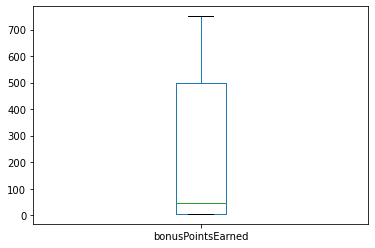

In [11]:
receipts.boxplot(column = ['bonusPointsEarned'],grid = False)
plt.show()

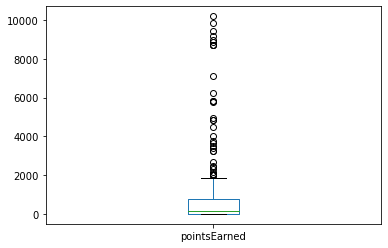

In [12]:
receipts.boxplot(column = ['pointsEarned'],grid = False)
plt.show()

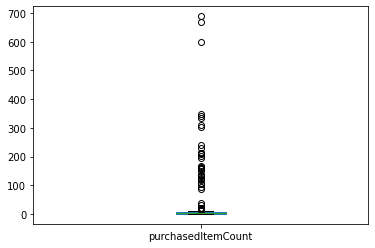

In [13]:
receipts.boxplot(column = ['purchasedItemCount'],grid = False)
plt.show()

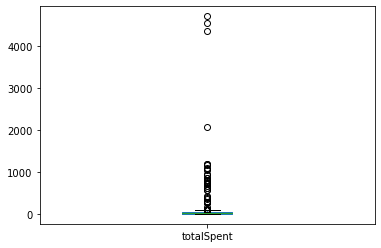

In [14]:
receipts.boxplot(column = ['totalSpent'],grid = False)
plt.show()

From four plots, we can observe that three of four columns have very large outlier, which 'lies' outside the whole dataset.

The next step is to explode the 'rewardsReceiptItemList' field as it contains lists of receipts using literal_eval function from ast. Then we need to split each dictionary and get the columns from it using json_normalize function in pandas.

In [15]:
receipts = receipts.explode('rewardsReceiptItemList')
receipts.reset_index(inplace=True)

In [16]:
receipts = receipts.fillna({'rewardsReceiptItemList':'{}'})
receipts['rewardsReceiptItemList'] = receipts['rewardsReceiptItemList'].apply(lambda x:str(x))
receipts['rewardsReceiptItemList'] = receipts['rewardsReceiptItemList'].apply(literal_eval)

In [17]:
receipts_norm = pd.json_normalize(receipts['rewardsReceiptItemList'],errors='ignore',record_prefix='rewardsReceiptItemList')\
.add_prefix('rewardsReceiptItemList.')

In [74]:
receipts = pd.merge(receipts, receipts_norm, left_index=True, right_index=True, how='outer')

### Convert String Object to Datetime

In [19]:
set().union(*(d.keys() for d in receipts['_id']))

{'$oid'}

In [20]:
set().union(*(d.keys() for d in receipts['createDate']))

{'$date'}

In [21]:
set().union(*(d.keys() for d in receipts['dateScanned']))

{'$date'}

In [22]:
set().union(*(d.keys() for d in receipts.dropna(subset=['finishedDate'])['finishedDate']))

{'$date'}

In [23]:
set().union(*(d.keys() for d in receipts.dropna(subset=['modifyDate'])['modifyDate']))

{'$date'}

In [24]:
set().union(*(d.keys() for d in receipts.dropna(subset=['pointsAwardedDate'])['pointsAwardedDate']))

{'$date'}

In [25]:
set().union(*(d.keys() for d in receipts.dropna(subset=['purchaseDate'])['purchaseDate']))

{'$date'}

We see that each of these columns contain only one dictionary key each so we just need to extract those. As for the columns related to time, the time is stored as UTC so we convert that into datetime format using the date converter function.

In [26]:
receipts['_id'] = receipts['_id'].apply(lambda x : x['$oid'])

In [27]:
def date_converter(x):
  try:
    return(datetime.utcfromtimestamp(int(x['$date'])/1000).strftime('%Y-%m-%d %H:%M:%S'))
  except TypeError:
    return(None)

In [28]:
receipts['createDate'] = receipts['createDate'].apply(lambda x : date_converter(x))
receipts['dateScanned'] = receipts['dateScanned'].apply(lambda x: date_converter(x))
receipts['finishedDate'] = receipts['finishedDate'].apply(lambda x: date_converter(x))
receipts['modifyDate'] = receipts['modifyDate'].apply(lambda x: date_converter(x))
receipts['pointsAwardedDate'] = receipts['pointsAwardedDate'].apply(lambda x: date_converter(x))
receipts['purchaseDate'] = receipts['purchaseDate'].apply(lambda x: date_converter(x))

In [29]:
receipts.head()

,index,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,...,rewardsReceiptItemList.itemNumber,rewardsReceiptItemList.originalMetaBriteQuantityPurchased,rewardsReceiptItemList.pointsEarned,rewardsReceiptItemList.targetPrice,rewardsReceiptItemList.competitiveProduct,rewardsReceiptItemList.originalFinalPrice,rewardsReceiptItemList.originalMetaBriteItemPrice,rewardsReceiptItemList.deleted,rewardsReceiptItemList.priceAfterCoupon,rewardsReceiptItemList.metabriteCampaignId
0,0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,None,2021-01-03 15:25:42,None,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Users table

In [30]:
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


In [31]:
users.dtypes

_id             object
active            bool
createdDate     object
lastLogin       object
role            object
signUpSource    object
state           object
dtype: object

In [32]:
set().union(*(d.keys() for d in users['_id']))

{'$oid'}

In [33]:
set().union(*(d.keys() for d in users['createdDate']))

{'$date'}

In [34]:
set().union(*(d.keys() for d in users.dropna(subset = ['lastLogin'])['lastLogin']))

{'$date'}

In [35]:
users['_id'] = users['_id'].apply(lambda x : x['$oid'])
users['createdDate'] = users['createdDate'].apply(lambda x : date_converter(x))
users['lastLogin'] = users['lastLogin'].apply(lambda x : date_converter(x))

In [36]:
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 15:25:30,2021-01-03 15:25:30,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI


## Brand Table

In [37]:
brands.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


In [38]:
set().union(*(d.keys() for d in brands['_id']))

{'$oid'}

In [39]:
set().union(*(d.keys() for d in brands['cpg']))

{'$id', '$ref'}

In [40]:
brands_norm = pd.json_normalize(brands['cpg'])
brands_norm = brands_norm.add_prefix('cpg.')
brands_norm

,cpg.$ref,cpg.$id.$oid
0,Cogs,601ac114be37ce2ead437550
1,Cogs,5332f5fbe4b03c9a25efd0ba
2,Cogs,601ac142be37ce2ead437559
3,Cogs,601ac142be37ce2ead437559
4,Cogs,5332fa12e4b03c9a25efd1e7
...,...,...
1162,Cogs,5f77274dbe37ce6b592e90bf
1163,Cogs,53e10d6368abd3c7065097cc
1164,Cogs,5332fa12e4b03c9a25efd1e7
1165,Cogs,5332f5f6e4b03c9a25efd0b4


In [41]:
brands = pd.merge(brands, brands_norm, left_index=True, right_index=True, how='outer')

In [42]:
brands['_id'] = brands['_id'].apply(lambda x: x['$oid'])

In [43]:
brands.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode,cpg.$ref,cpg.$id.$oid
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN,Cogs,601ac114be37ce2ead437550
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS,Cogs,5332f5fbe4b03c9a25efd0ba
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,Cogs,601ac142be37ce2ead437559
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,Cogs,601ac142be37ce2ead437559
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,Cogs,5332fa12e4b03c9a25efd1e7


# Second: Write a query that directly answers a predetermined question from a business stakeholder

In [44]:
engine = create_engine('sqlite://', echo=False)

In [45]:
receipts.columns = receipts.columns.str.replace(".", "_")

In [46]:
receipts.drop(columns=['rewardsReceiptItemList'],axis=1).to_sql('receipts',con=engine)

In [47]:
users.drop_duplicates(subset=['_id']).to_sql('users',con=engine)

In [48]:
brands.drop_duplicates(subset=['brandCode']).drop(columns=['cpg'],axis=1).to_sql('brands',con=engine)

What are the top 5 brands by receipts scanned for most recent month?

In [99]:
engine.execute("select r.rewardsReceiptItemList_brandCode, count(*) from Receipts r left join Brands b on r._id = b._id where strftime('%Y-%m',r.dateScanned) = (select strftime('%Y-%m',max(dateScanned)) from Receipts) group by r.rewardsReceiptItemList_brandCode order by count(*) desc limit 5;").fetchall()

[(None, 43)]

Most recent month for this dataset is '2021-03', we only got null value for the brand name, so we decide to move back one more month to check the results

In [108]:
engine.execute("select r.rewardsReceiptItemList_brandCode, count(*) from Receipts r left join Brands b on r._id = b._id where strftime('%Y-%m',r.dateScanned) = (select strftime('%Y-%m',max(dateScanned),'-1 month') from Receipts) group by r.rewardsReceiptItemList_brandCode order by count(*) desc limit 5;").fetchall()

[(None, 509), ('BRAND', 3), ('MISSION', 2), ('VIVA', 1)]

For '2021-02', we found that there are three brand names shown after executing the SQL query

# Third: Evaluate Data Quality Issues in the Data Provided

In [50]:
len(set(receipts.dropna(subset=['rewardsReceiptItemList_brandCode'])['rewardsReceiptItemList_brandCode']))

227

In [51]:
len(set(brands.dropna(subset=['brandCode'])['brandCode']))

897

As we see there are a lot more unique brand codes in the brands dataset compared to the receipts. 
Now we compare the two datasets and see whether all the receipts with a brand code can be mapped to the brands table. If not, find all the receipts with barcode which doesn't have barcode in the brand dataset.

In [57]:
receipts_dropped = receipts.dropna(subset=['rewardsReceiptItemList_brandCode']).copy()
receipts_dropped.loc[:,'rewardsReceiptItemList_brandCode'] = receipts_dropped['rewardsReceiptItemList_brandCode'].apply(lambda x:str(x))

In [58]:
receipts_dropped

,index,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,...,rewardsReceiptItemList_itemNumber,rewardsReceiptItemList_originalMetaBriteQuantityPurchased,rewardsReceiptItemList_pointsEarned,rewardsReceiptItemList_targetPrice,rewardsReceiptItemList_competitiveProduct,rewardsReceiptItemList_originalFinalPrice,rewardsReceiptItemList_originalMetaBriteItemPrice,rewardsReceiptItemList_deleted,rewardsReceiptItemList_priceAfterCoupon,rewardsReceiptItemList_metabriteCampaignId
8,6,5ff1e1cd0a720f052300056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:01,2021-01-03 15:25:01,2021-01-03 15:25:02,2021-01-03 15:25:02,2021-01-03 15:25:02,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7,5ff1e1a40a720f0523000569,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:24:20,2021-01-03 15:24:20,2021-01-03 15:24:21,2021-01-03 15:24:21,2021-01-03 15:24:21,500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,47,5ff29be20a7214ada1000571,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-01-04 04:38:58,2021-01-04 04:38:58,2021-01-04 04:39:06,2021-01-04 04:39:09,2021-01-04 04:39:06,25.0,...,044000000745,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
308,108,5ff618e30a7214ada10005fa,750.0,"Receipt number 1 completed, bonus point schedu...",2021-01-06 20:09:07,2021-01-06 20:09:07,2021-01-06 20:09:42,2021-01-06 20:09:45,2021-01-06 20:09:42,793.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PEPSI 12 OZ 12 PACK
310,108,5ff618e30a7214ada10005fa,750.0,"Receipt number 1 completed, bonus point schedu...",2021-01-06 20:09:07,2021-01-06 20:09:07,2021-01-06 20:09:42,2021-01-06 20:09:45,2021-01-06 20:09:42,793.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DORITOS NACHO CHEESE MULTI SERVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,688,60189cc10a7214ad28000050,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-02-02 00:28:49,2021-02-02 00:28:49,2021-02-02 00:28:50,2021-02-02 00:28:50,2021-02-02 00:28:50,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6874,691,60189cae0a7214ad2800004f,5.0,All-receipts receipt bonus,2021-02-02 00:28:30,2021-02-02 00:28:30,2021-02-02 00:28:31,2021-02-02 00:28:31,2021-02-02 00:28:31,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7123,917,602454340a720f05a80001ae,750.0,"Receipt number 1 completed, bonus point schedu...",2021-02-10 21:46:28,2021-02-10 21:46:28,2021-02-10 21:46:29,2021-02-10 21:46:37,2021-02-10 21:46:29,789.2,...,NaN,NaN,39.2,NaN,NaN,NaN,NaN,NaN,NaN,VIVA MULTI SURFACE CLOTH PAPER TOWEL
7170,951,602538b30a7214d8e9000248,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-02-11 14:01:23,2021-02-11 14:01:23,2021-02-11 14:01:24,2021-02-11 14:01:24,2021-02-11 14:01:24,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
brands['barcode'] = brands['barcode'].apply(lambda x: str(x))
brands['brandCode'] = brands['brandCode'].apply(lambda x: str(x))

In [55]:
receipts_with_brands = pd.merge(receipts,brands,left_on='rewardsReceiptItemList_brandCode',right_on='brandCode')

In [56]:
set(receipts_dropped[~(receipts_dropped['rewardsReceiptItemList_brandCode'].isin(brands['brandCode']))]['rewardsReceiptItemList_brandCode'])

{'7UP',
 'ADVIL',
 'AMERICAN BEAUTY',
 'ARROWHEAD',
 'AZTECA',
 'BANZA',
 'BEAR CREEK COUNTRY KITCHENS',
 'BEN AND JERRYS',
 'BETTY CROCKER',
 'BIC',
 'BIGELOW',
 'BLUE DIAMOND',
 "BOAR'S HEAD",
 'BORDEN',
 'BOTA BOX',
 'BRAND',
 "BRASWELL'S",
 'BUNNY',
 "BUSH'S BEST",
 'C&H',
 'CADBURY',
 'CAL-ORGANIC FARMS',
 'CALIFIA FARMS',
 "CAMPBELL'S",
 'CARAMELLO',
 'CHEERIOS',
 'CHEESE',
 'CHEEZ-IT',
 'CHEX',
 'CHICKEN OF THE SEA',
 'CHIQUITA',
 'CINNAMON TOAST CRUNCH',
 'COKE',
 'COLEMAN NATURAL',
 "CONNIE'S PIZZA",
 'CREST 3D WHITE',
 'CRISPIX',
 'DANNON',
 'DARE',
 'DELI',
 'DIET COKE',
 'DIGIORNO',
 'DOLE',
 'DR PEPPER',
 'EDWARDS',
 "EGGLAND'S BEST",
 'EGGO',
 'EL MONTEREY',
 'ENERGIZER MAX',
 'ESSENTIAL EVERYDAY',
 'FAGE',
 "FAMOUS DAVE'S",
 "FLORIDA'S NATURAL",
 'FOLGERS',
 'FORTUNE YAKISOBA',
 'FRANZ',
 "FRENCH'S",
 'FRESH EXPRESS',
 'FRESH STEP',
 'FRONTERA',
 'GALLO FAMILY VINEYARDS',
 'GENERAL MILLS',
 'GERBER',
 'GERM-X',
 'GREEN GIANT',
 'GRIMMWAY FARMS',
 'HANOVER',
 'HARVEST SNA

Above are all the receipts with a brand code but the codes are missing in the brands table. This would be an issue as a lot of data will be missing when we query between the two tables. The data consistency does exist.